In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

model = tf.keras.models.Sequential([
	tf.keras.layers.Dense(784, activation=tf.nn.relu),
	tf.keras.layers.Dense(784, activation=tf.nn.sigmoid)])

model.compile(optimizer="Adadelta",
	loss="binary_crossentropy",
	metrics=["accuracy"])

(x_train, _), (x_validate, _) = mnist.load_data()
x_train, x_validate = x_train / 255.0, x_validate / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_validate = x_validate.reshape((len(x_validate), np.prod(x_validate.shape[1:])))

model.fit(x_train, x_train, epochs = 5)
model.evaluate(x_validate, x_validate)

Epoch 1/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1869 - acc: 0.8040
Epoch 2/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1196 - acc: 0.8125
Epoch 3/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0993 - acc: 0.8142
Epoch 4/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0889 - acc: 0.8148
Epoch 5/5
10000/10000 [==============================] - 2s 220us/step


[0.08028096410036087, 0.8141015316963196]

In [2]:
decoded_image = model.predict(x_validate)

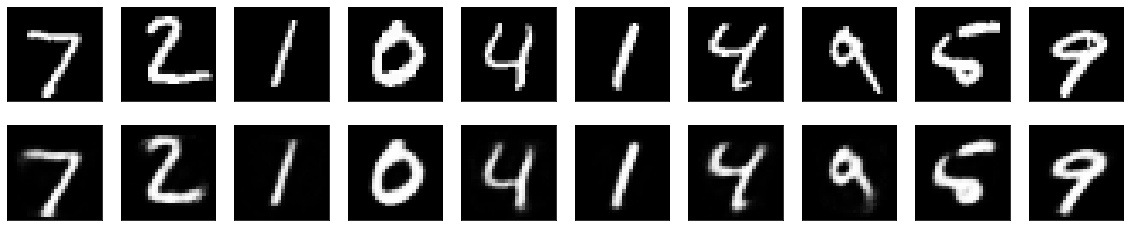

In [5]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
	
	image = plt.subplot(2, n, i+1)
	plt.imshow(x_validate[i].reshape(28,28))
	plt.gray()
	image.get_xaxis().set_visible(False)
	image.get_yaxis().set_visible(False)

	image = plt.subplot(2, n, i+1+n)
	plt.imshow(decoded_image[i].reshape(28,28))
	plt.gray()
	image.get_xaxis().set_visible(False)
	image.get_yaxis().set_visible(False)